# Entrenamiento de modelo de RandomForest

In [379]:
# importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report

scaler = StandardScaler()

## Carga de datos

In [380]:
base_path = '../prepared_data.csv'
try:
  df = pd.read_csv(base_path)
  display(df.head())
  print("\n\n ---------------\n Tamaño del dataset: ", df.shape)
except FileNotFoundError:
  print(f'El dataset no se encuentra en la ruta {base_path}')
except Exception as e:
  print(f'Error: {e}')
  df = None

,Id,Coarseness/ngtdm/original,Energy/firstorder/original,GrayLevelNonUniformity/glrlm/original,GrayLevelNonUniformity/glszm/original,Idn/glcm/original,LargeDependenceHighGrayLevelEmphasis/gldm/original,Maximum/Image-original/diagnostics,RunLengthNonUniformity/glrlm/original,SmallDependenceLowGrayLevelEmphasis/gldm/original,TotalEnergy/firstorder/original,VolumeNum/Mask-original/diagnostics,VoxelNum/Mask-original/diagnostics,ZoneEntropy/glszm/original,y.BoundingBox/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,highGrade
0,0.783201,0.007719,11157480.0,158.590584,17.388889,0.935386,652.826984,237.0,175.099687,0.006669,1.115748e+07,1.0,1260,4.696937,138.0,161.988889,True
1,0.729412,0.004074,32066209.0,293.777441,50.100719,0.934436,611.548231,253.0,546.590764,0.009179,3.206621e+07,1.0,2685,5.422075,112.0,149.808566,True
2,0.662097,0.002515,57729042.0,435.126064,85.296015,0.934934,660.159679,270.0,961.241702,0.008074,5.505470e+07,1.0,3244,5.453404,104.0,152.673859,True
3,0.782308,0.006769,55589372.0,158.487887,27.150943,0.951514,1143.141304,314.0,273.906764,0.006239,4.038406e+07,1.0,1840,5.047446,150.0,171.559783,True
4,0.585369,0.006528,507941638.0,149.244465,44.787419,0.949190,3356.104019,981.0,696.367524,0.001814,1.705622e+09,1.0,1692,5.763565,181.0,202.115248,True




 ---------------
 Tamaño del dataset:  (128, 17)


## Analizando las 15 columnas

In [381]:
radiomic_feat = df.drop(columns=['Id', 'highGrade'])

scaled = scaler.fit_transform(radiomic_feat)
radiomic_scaled = pd.DataFrame(scaled, columns=radiomic_feat.columns)
varianza_normalizada = radiomic_scaled.var().sort_values(ascending=False)
top_vars = varianza_normalizada.head(15).index
radiomic_scaled[top_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
Coarseness/ngtdm/original,128.0,-2.081668e-16,1.003929,-0.993220,-0.561353,-0.247492,0.143666,5.783820
GrayLevelNonUniformity/glrlm/original,128.0,-2.463307e-16,1.003929,-1.423350,-0.656708,-0.247751,0.401528,6.129740
GrayLevelNonUniformity/glszm/original,128.0,-1.075529e-16,1.003929,-1.584258,-0.789048,-0.184070,0.630162,2.736021
Idn/glcm/original,128.0,3.710574e-15,1.003929,-2.922850,-0.751965,0.067956,0.641288,2.012528
y.BoundingBox/Mask-original/diagnostics,128.0,-1.214306e-17,1.003929,-1.520262,-0.582195,-0.158551,0.335700,3.482765
TotalEnergy/firstorder/original,128.0,-4.163336e-17,1.003929,-0.669244,-0.657403,-0.577596,0.381704,5.272357
RunLengthNonUniformity/glrlm/original,128.0,1.283695e-16,1.003929,-1.054226,-0.741270,-0.269354,0.503669,4.857540
y.CenterOfMassIndex/Mask-original/diagnostics,128.0,-1.543904e-16,1.003929,-1.436259,-0.726093,-0.184916,0.373696,3.264372
VoxelNum/Mask-original/diagnostics,128.0,-1.040834e-17,1.003929,-0.961808,-0.561114,-0.349596,0.154606,4.074318
Energy/firstorder/original,128.0,-1.387779e-17,1.003929,-0.597632,-0.565559,-0.455612,0.126823,5.665882


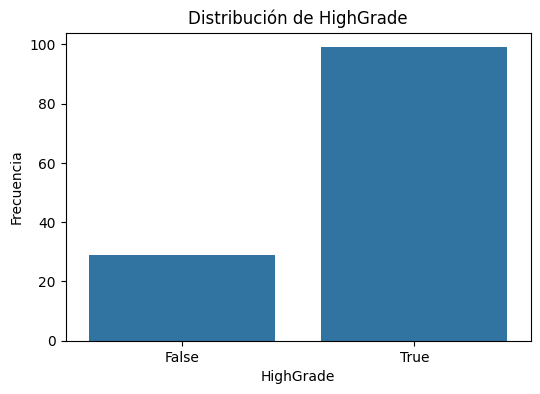

Porcentaje de True: 77.34%
Porcentaje de False: 22.66%


In [382]:
hg_value_counts = df['highGrade'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='highGrade', data=df)
plt.title('Distribución de HighGrade')
plt.xlabel('HighGrade')
plt.ylabel('Frecuencia')
plt.show()

print(f"Porcentaje de True: {hg_value_counts[True] / len(df) * 100:.2f}%")
print(f"Porcentaje de False: {hg_value_counts[False] / len(df) * 100:.2f}%")

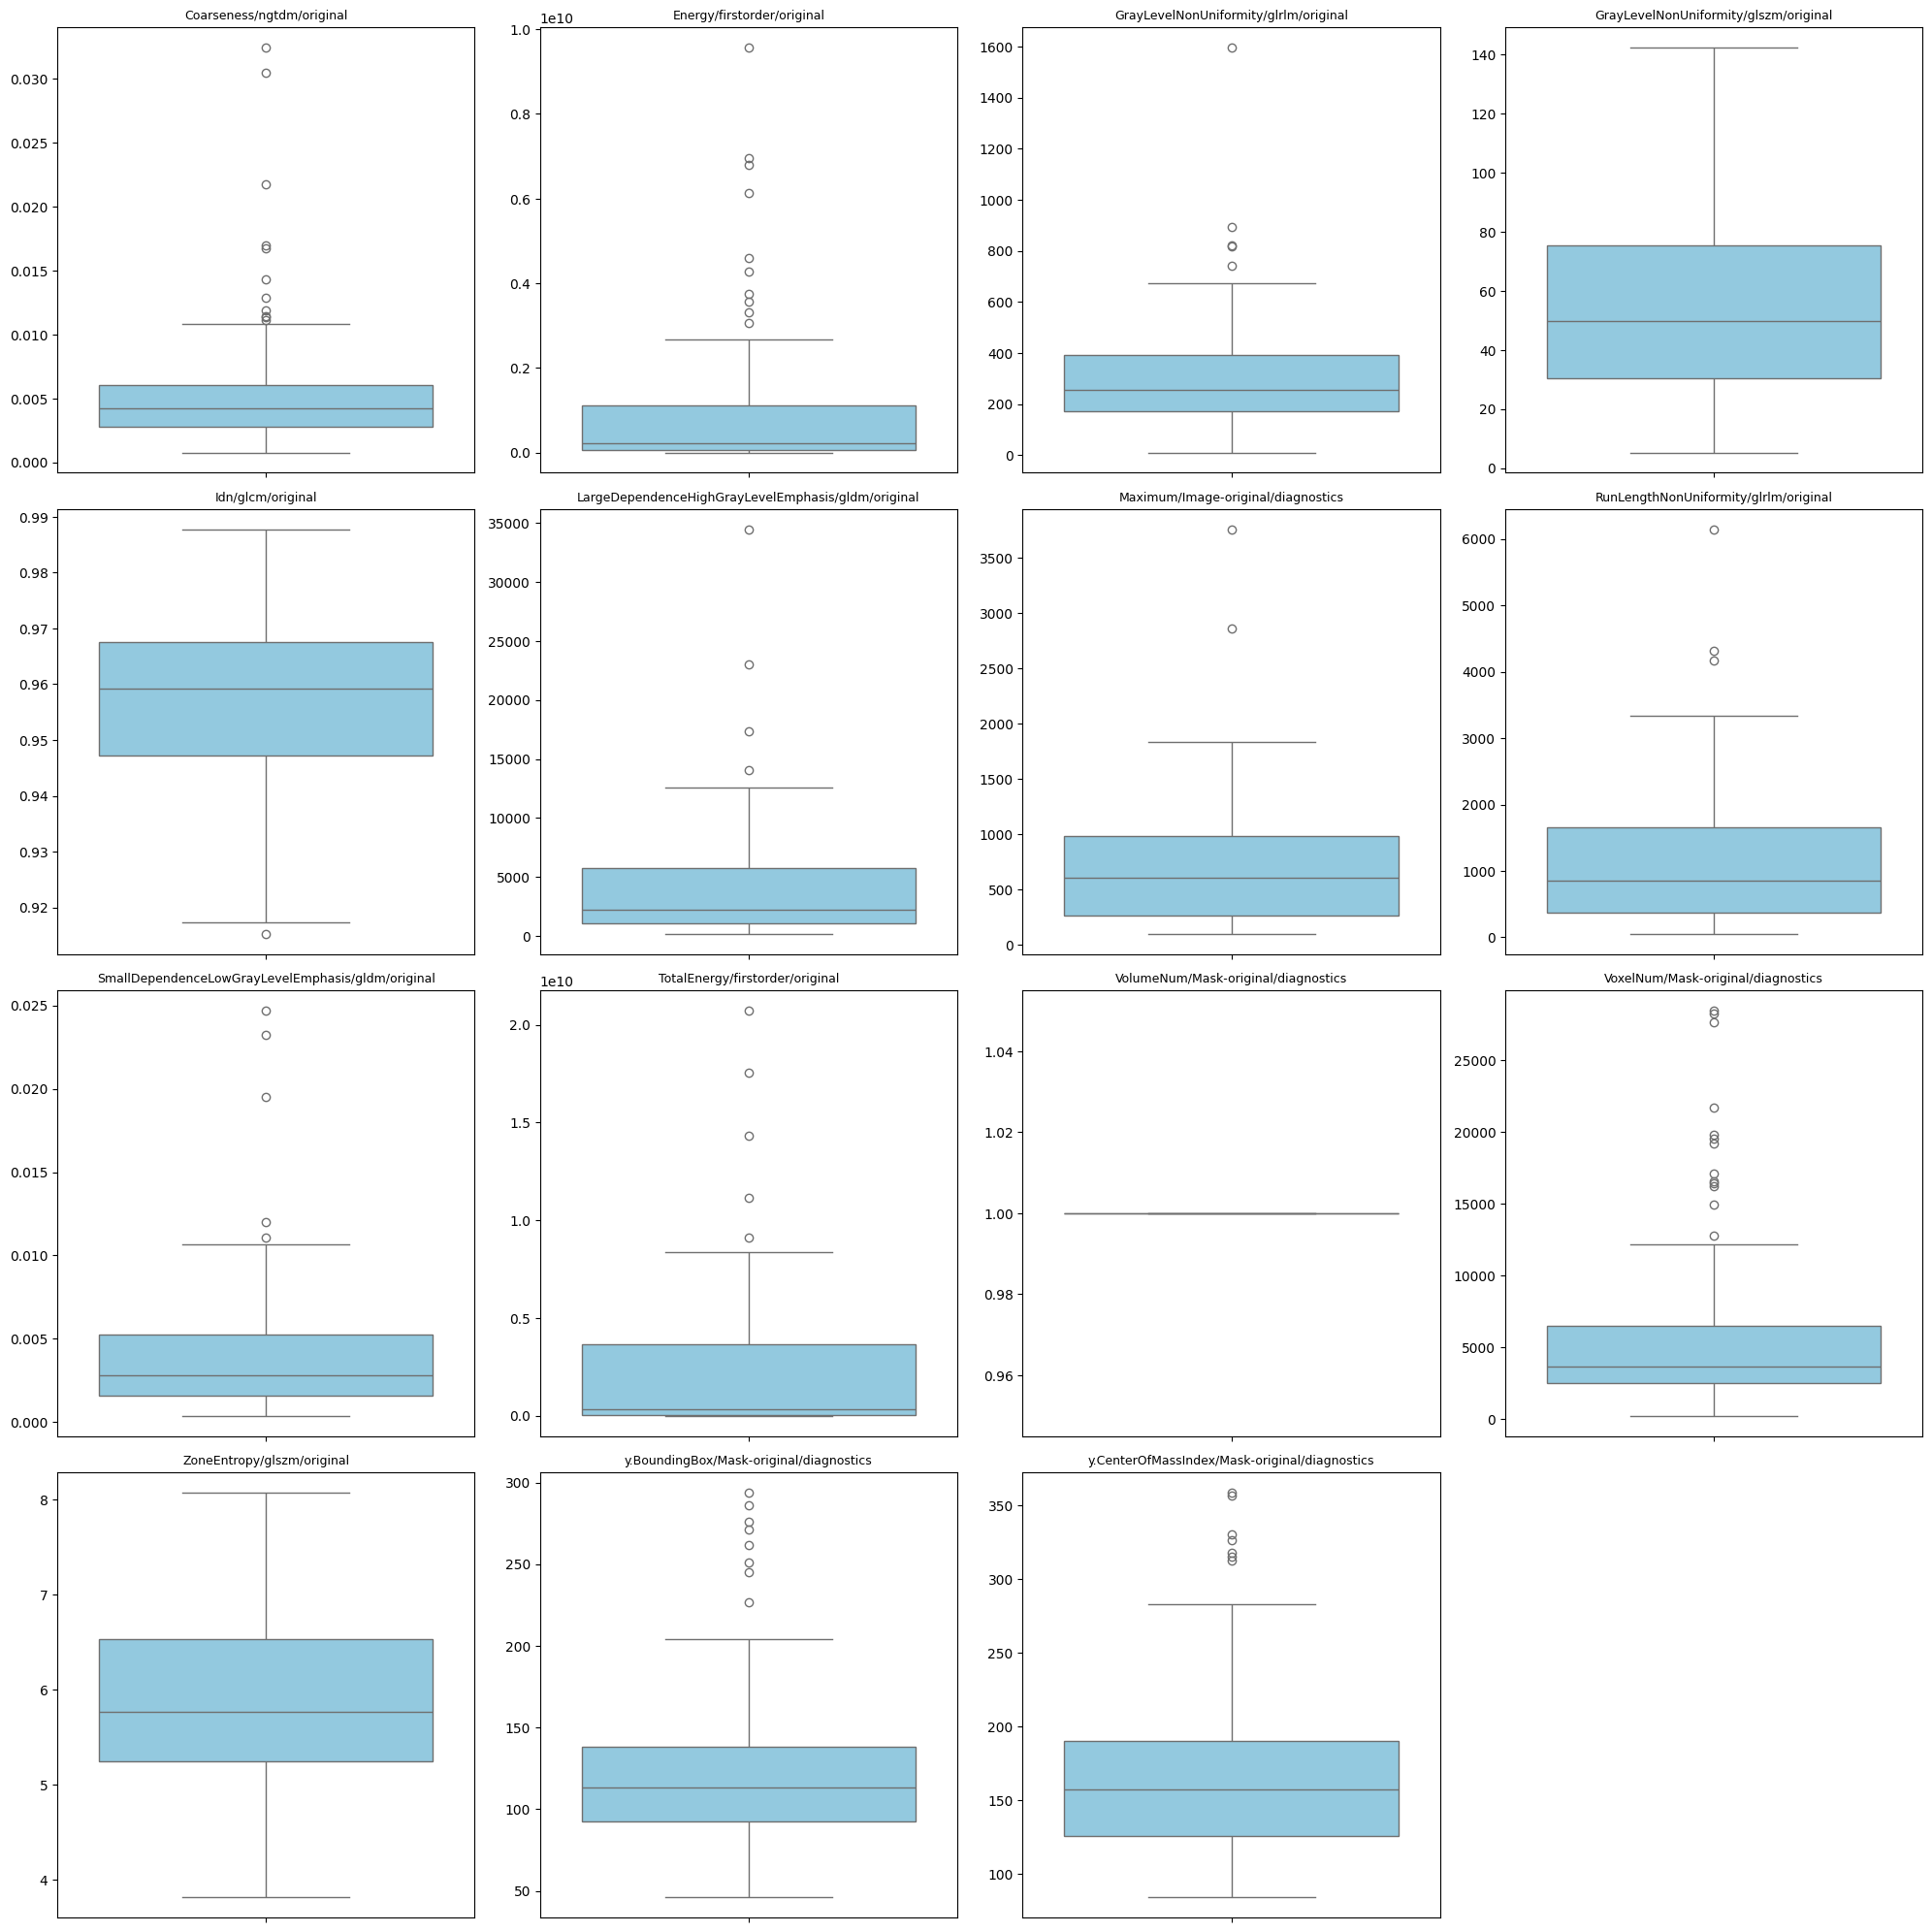

In [383]:
# diagramas de caja y bigote

radiomic_feat = df.drop(columns=['Id', 'highGrade'])
num_cols = len(radiomic_feat.columns)
cols = 4
rows = int(np.ceil(num_cols / cols))
plt.figure(figsize=(cols * 5, rows * 5))
for i, col in enumerate(radiomic_feat.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=radiomic_feat[col], color="skyblue")
    plt.title(col, fontsize=9)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout(pad=1.0)
plt.show()

## Entrenamiento de modelo

In [384]:
X = df.drop(columns=['Id', 'highGrade'])
y = df['highGrade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

In [385]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [386]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Optimización de modelo con RandomizedSearchCV

In [387]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', {True: 1, False: 2}, {True: 1, False: 3}]
}

# función personalizada de scoring
def custom_scorer(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return (accuracy + roc_auc + f1) / 3

scoring = 'roc_auc'
#scoring = make_scorer(custom_scorer)

new_rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=new_rf_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scoring,
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced'}
Best score: 0.6945833333333333


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=5, n_estimators=50,
                       random_state=42)

## Función de evaluación del modelo usando las métricas definidas en el documento

In [388]:
def evaluate_model(model_to_test, X_test, y_test):
  y_pred = model_to_test.predict(X_test)

  print(classification_report(y_test, y_pred))

  print("\n\n\n")

  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Predicción False', 'Predicción True'],
              yticklabels=['Verdaderos Negativos', 'Verdaderos Positivos'])
  plt.title('Matriz de confusión')
  plt.xlabel('Predicción')
  plt.ylabel('Valor real')
  plt.show()

  print("\n\n\n")

  accuracy = accuracy_score(y_test, y_pred)
  auc_roc = roc_auc_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  print(f"Exactitud (Accuracy): {accuracy}")
  print(f"Área bajo la curva (AUC-ROC): {auc_roc}")
  print(f"F1-score: {f1}")
  print(f"Sensibilidad: {sensitivity}")
  print(f"Especificidad: {specificity}")

## Comparación de modelo básico vs modelo con hiperparámetros

### Modelo básico

              precision    recall  f1-score   support

       False       0.67      0.33      0.44         6
        True       0.83      0.95      0.88        20

    accuracy                           0.81        26
   macro avg       0.75      0.64      0.66        26
weighted avg       0.79      0.81      0.78        26







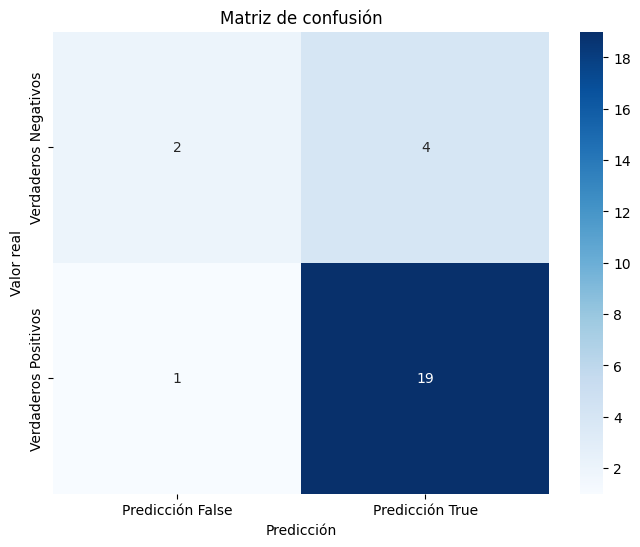





Exactitud (Accuracy): 0.8076923076923077
Área bajo la curva (AUC-ROC): 0.6416666666666666
F1-score: 0.8837209302325582
Sensibilidad: 0.95
Especificidad: 0.3333333333333333


In [389]:
evaluate_model(rf_model, X_test_scaled, y_test)

              precision    recall  f1-score   support

       False       0.26      0.35      0.30        23
        True       0.79      0.71      0.75        79

    accuracy                           0.63       102
   macro avg       0.52      0.53      0.52       102
weighted avg       0.67      0.63      0.65       102







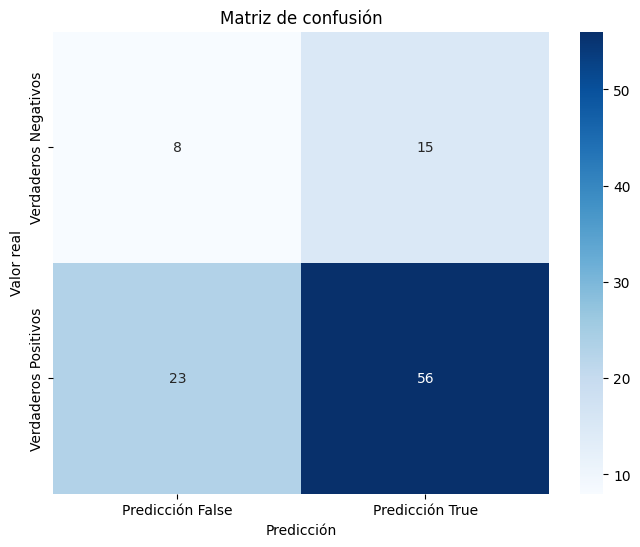





Exactitud (Accuracy): 0.6274509803921569
Área bajo la curva (AUC-ROC): 0.5283434232250963
F1-score: 0.7466666666666667
Sensibilidad: 0.7088607594936709
Especificidad: 0.34782608695652173


In [403]:
import pickle
with open('best_rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

evaluate_model(model, X_train_scaled, y_train)

### Modelo mejorado con hiperparámetros

              precision    recall  f1-score   support

       False       0.50      0.33      0.40         6
        True       0.82      0.90      0.86        20

    accuracy                           0.77        26
   macro avg       0.66      0.62      0.63        26
weighted avg       0.74      0.77      0.75        26







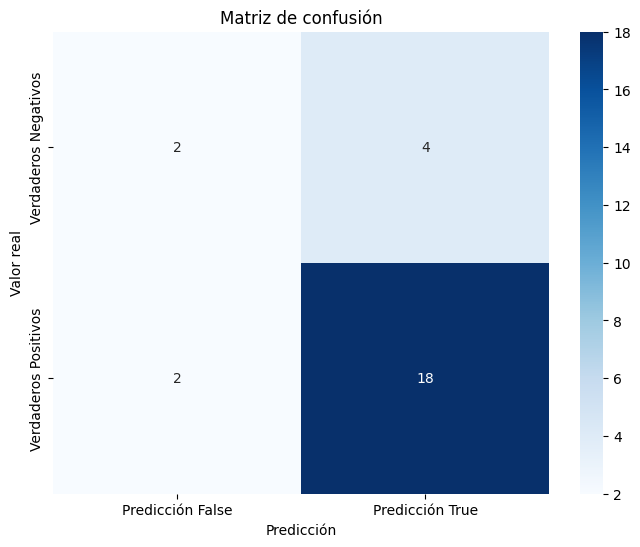





Exactitud (Accuracy): 0.7692307692307693
Área bajo la curva (AUC-ROC): 0.6166666666666667
F1-score: 0.8571428571428571
Sensibilidad: 0.9
Especificidad: 0.3333333333333333


In [391]:
evaluate_model(best_rf_model, X_test_scaled, y_test)

In [392]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

---
# OTRO INTENTO

In [393]:
def cap_outliers_iqr(df):
    df_capped = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = df[col].clip(lower, upper)
    return df_capped

new_df = cap_outliers_iqr(df)

In [394]:
radiomic_feat = new_df.drop(columns=['Id', 'highGrade'])

scaled = scaler.fit_transform(radiomic_feat)
radiomic_scaled = pd.DataFrame(scaled, columns=radiomic_feat.columns)
varianza_normalizada = radiomic_scaled.var().sort_values(ascending=False)
top_vars = varianza_normalizada.head(15).index
radiomic_scaled[top_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
GrayLevelNonUniformity/glrlm/original,128.0,7.632783e-17,1.003929,-1.678792,-0.744387,-0.245938,0.545423,2.480138
y.CenterOfMassIndex/Mask-original/diagnostics,128.0,-3.851086e-16,1.003929,-1.567443,-0.769105,-0.160737,0.467230,2.321732
RunLengthNonUniformity/glrlm/original,128.0,2.116363e-16,1.003929,-1.142598,-0.793640,-0.267436,0.594514,2.676745
GrayLevelNonUniformity/glszm/original,128.0,-1.075529e-16,1.003929,-1.584258,-0.789048,-0.184070,0.630162,2.736021
Idn/glcm/original,128.0,1.172673e-15,1.003929,-2.847678,-0.753975,0.067447,0.641827,2.015576
Coarseness/ngtdm/original,128.0,-4.163336e-17,1.003929,-1.516452,-0.768791,-0.225423,0.451762,2.282590
Energy/firstorder/original,128.0,0.000000e+00,1.003929,-0.803268,-0.748388,-0.560259,0.436341,2.213434
Maximum/Image-original/diagnostics,128.0,5.204170e-18,1.003929,-1.250905,-0.892579,-0.147454,0.651930,2.968692
LargeDependenceHighGrayLevelEmphasis/gldm/original,128.0,-3.122502e-17,1.003929,-1.032053,-0.769480,-0.454594,0.534227,2.489788
VoxelNum/Mask-original/diagnostics,128.0,-3.469447e-18,1.003929,-1.317608,-0.679799,-0.343112,0.459456,2.168339


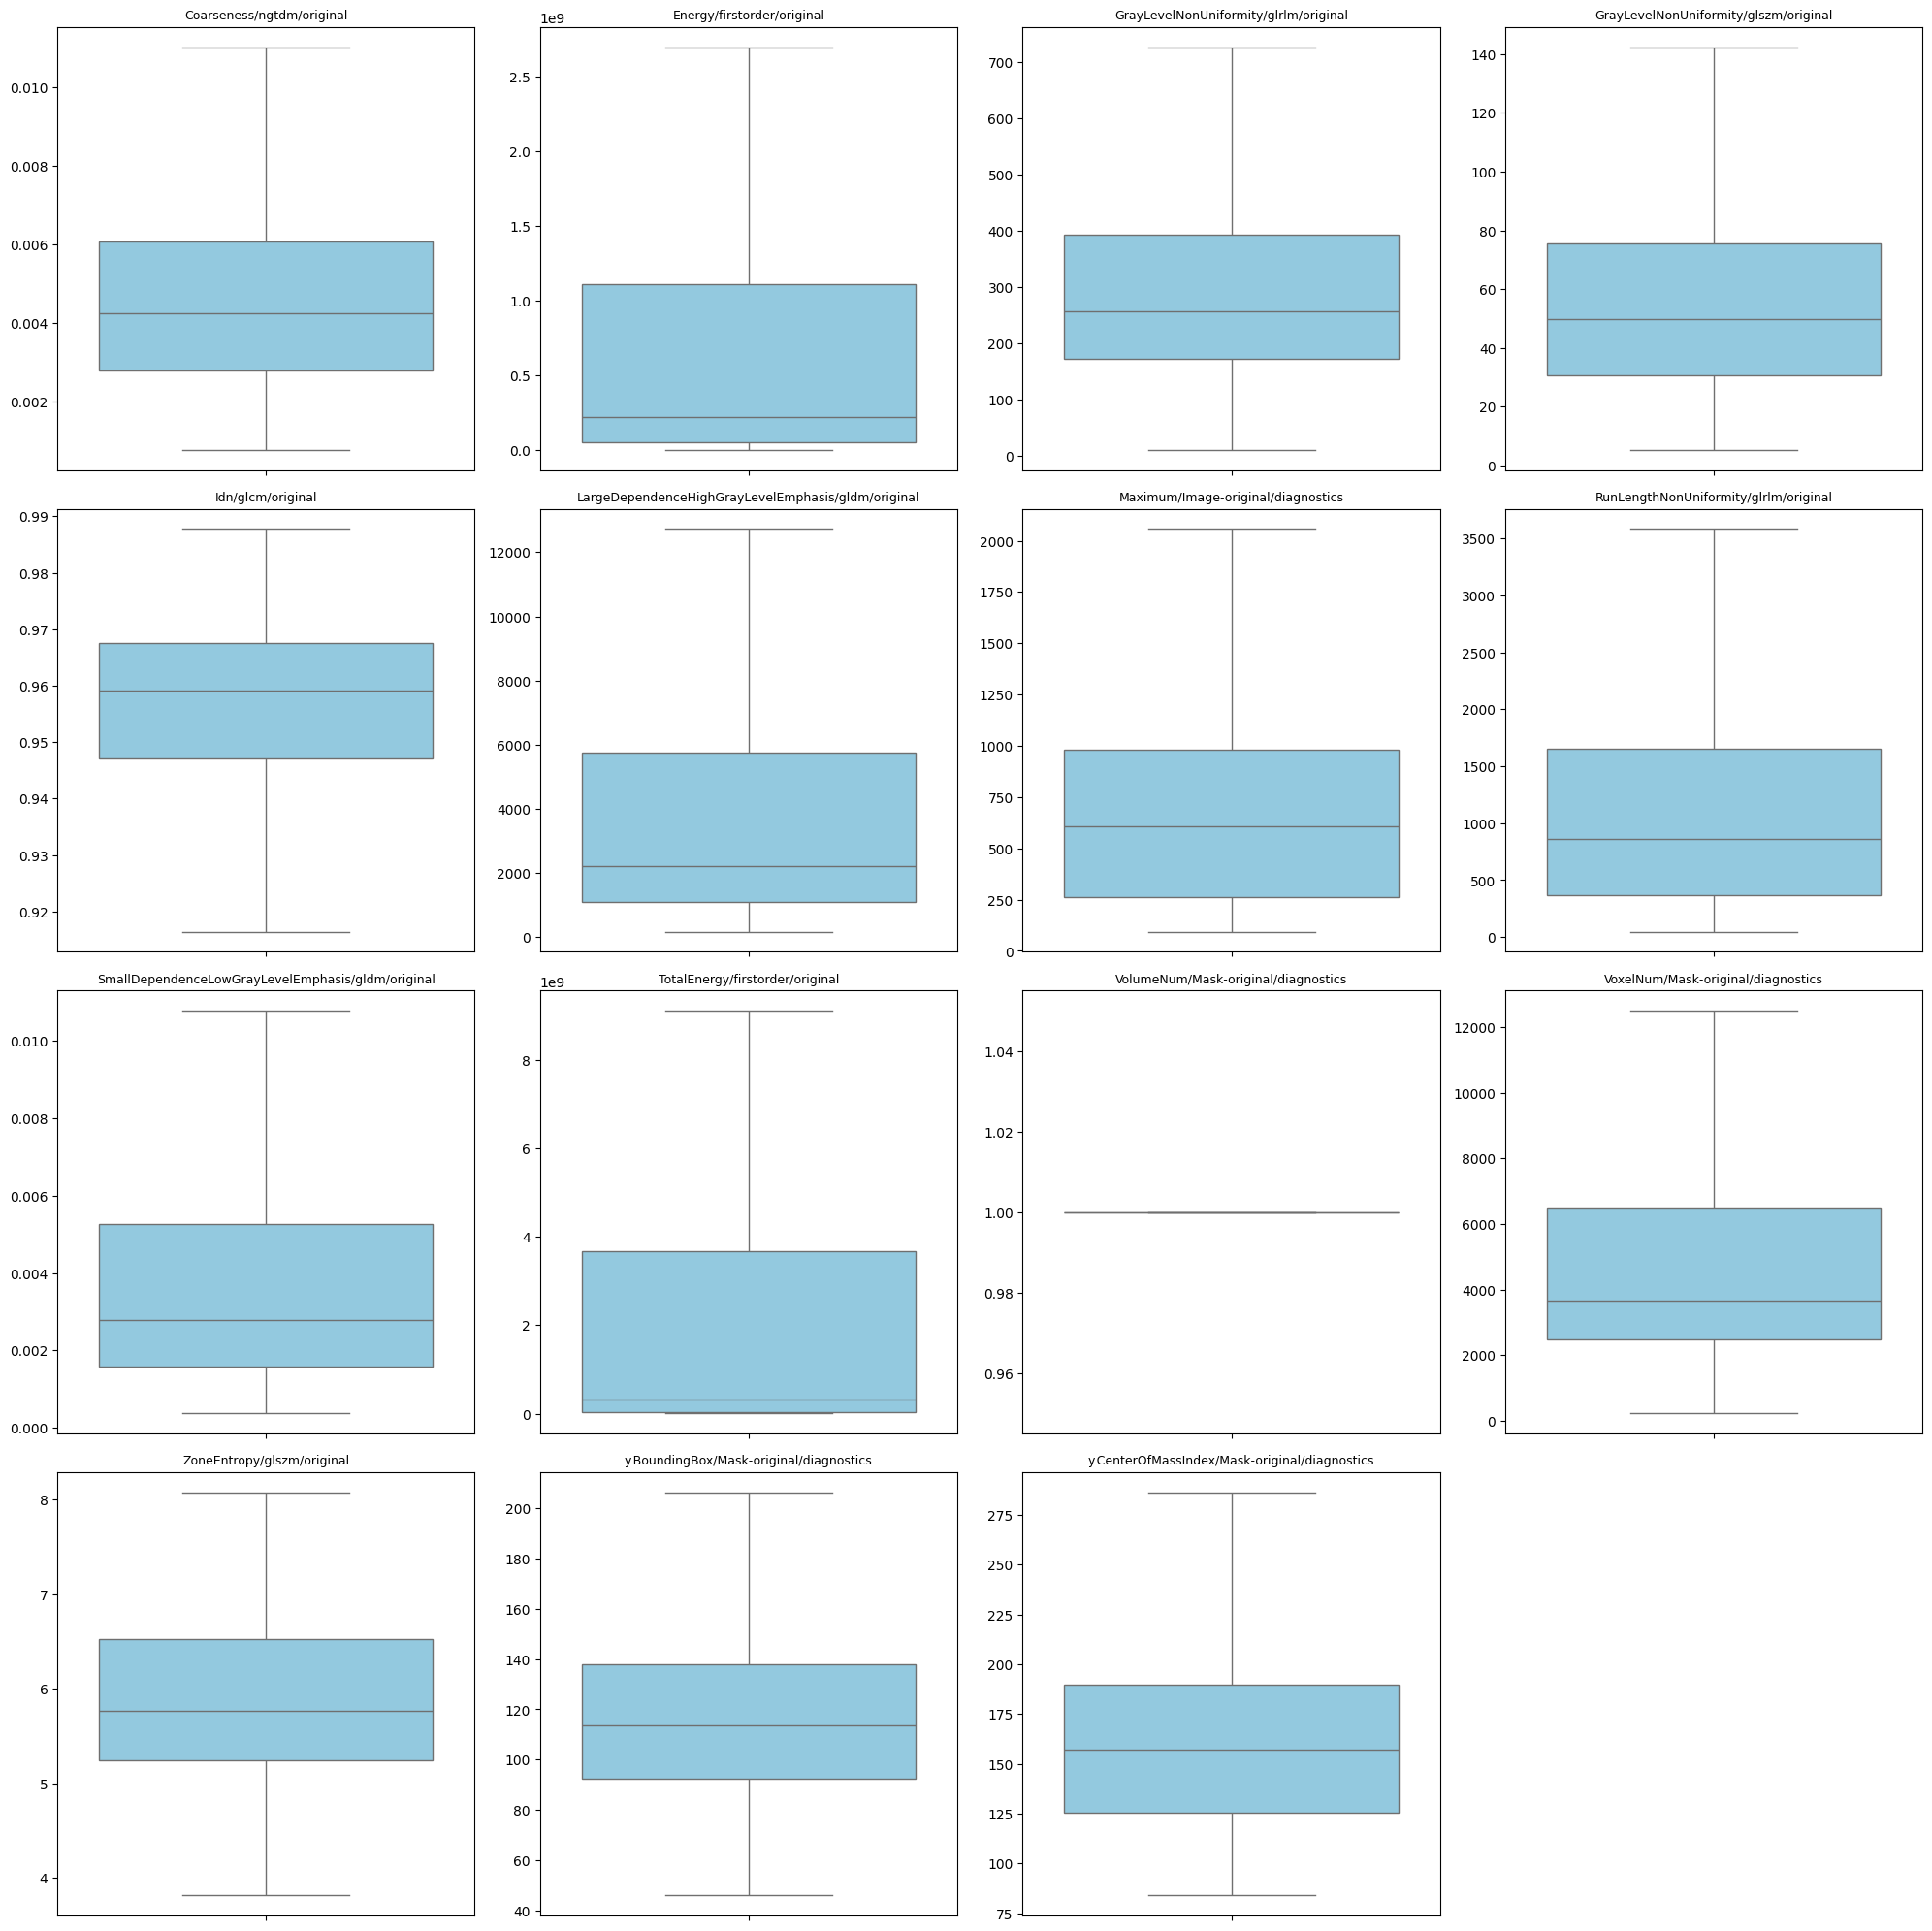

In [395]:
# diagramas de caja y bigote

radiomic_feat = new_df.drop(columns=['Id', 'highGrade'])
num_cols = len(radiomic_feat.columns)
cols = 4
rows = int(np.ceil(num_cols / cols))
plt.figure(figsize=(cols * 5, rows * 5))
for i, col in enumerate(radiomic_feat.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=radiomic_feat[col], color="skyblue")
    plt.title(col, fontsize=9)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout(pad=1.0)
plt.show()

In [396]:
new_X = new_df.drop(columns=['Id', 'highGrade'])
new_y = new_df['highGrade']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify=new_y)

In [397]:
new_X_train_scaled = scaler.fit_transform(new_X_train)
new_X_test_scaled = scaler.transform(new_X_test)

In [398]:
new_rf_model = RandomForestClassifier(random_state=42)
new_rf_model.fit(new_X_train_scaled, new_y_train)

RandomForestClassifier(random_state=42)

In [399]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', {True: 1, False: 2}, {True: 1, False: 3}]
}

# función personalizada de scoring
def custom_scorer(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return (accuracy + roc_auc + f1) / 3

scoring = 'roc_auc'
#scoring = make_scorer(custom_scorer)

base_rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=base_rf_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scoring,
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)
random_search.fit(new_X_train_scaled, new_y_train)

print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

new_best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
new_best_rf_model.fit(new_X_train_scaled, new_y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best score: 0.7319166666666667


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42)

              precision    recall  f1-score   support

       False       0.33      0.17      0.22         6
        True       0.78      0.90      0.84        20

    accuracy                           0.73        26
   macro avg       0.56      0.53      0.53        26
weighted avg       0.68      0.73      0.70        26







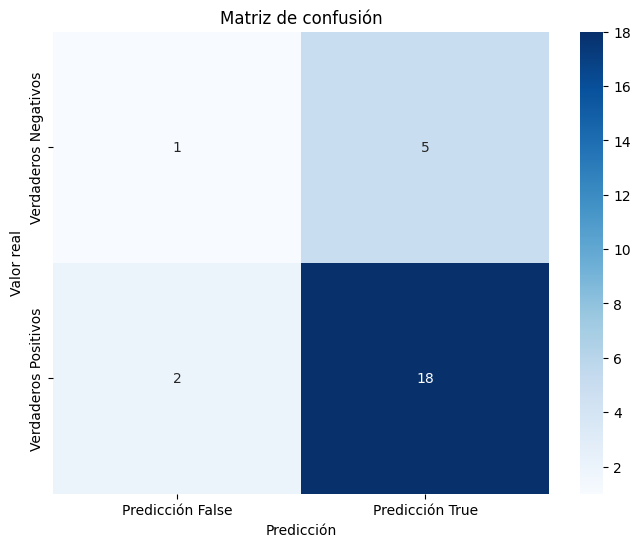





Exactitud (Accuracy): 0.7307692307692307
Área bajo la curva (AUC-ROC): 0.5333333333333333
F1-score: 0.8372093023255814
Sensibilidad: 0.9
Especificidad: 0.16666666666666666


In [400]:
evaluate_model(new_rf_model, new_X_test_scaled, new_y_test)

              precision    recall  f1-score   support

       False       0.25      0.17      0.20         6
        True       0.77      0.85      0.81        20

    accuracy                           0.69        26
   macro avg       0.51      0.51      0.50        26
weighted avg       0.65      0.69      0.67        26







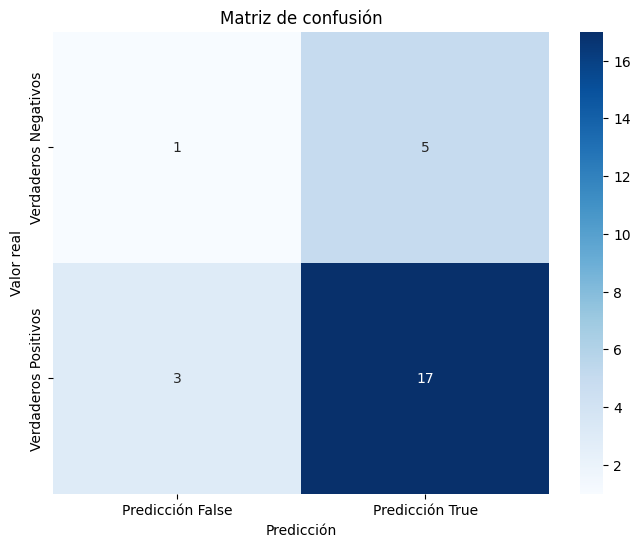





Exactitud (Accuracy): 0.6923076923076923
Área bajo la curva (AUC-ROC): 0.5083333333333333
F1-score: 0.8095238095238095
Sensibilidad: 0.85
Especificidad: 0.16666666666666666


In [401]:
evaluate_model(new_best_rf_model, new_X_test_scaled, new_y_test)